## Adjusting Brightness and Contrast (Using Linear Functions)

In the previous notebook, you learned how **mathematical operations on images** can affect brightness, and you saw how **adding or subtracting a constant value** changes the **brightness** of an image.  

Now, in addition to brightness, we will also examine **contrast** and discuss the **limitations of linear methods**.

- **Brightness:** the overall lightness of an image; it can be adjusted by adding or subtracting a constant value to the pixels.  
- **Contrast:** the difference between the darkest and brightest areas of an image; increasing contrast makes details more pronounced.  

> You will see that **simple linear methods** for adjusting brightness and contrast can sometimes lead to **loss of information in very dark or very bright areas** of the image.


$$g(x) = \alpha f(x) + \beta$$
$$\alpha > 0$$

The parameters α and β are often called the gain and bias parameters.
sometimes these parameters are said to control contrast and brightness respectively.

### do it with `convertScaleAbs()` function

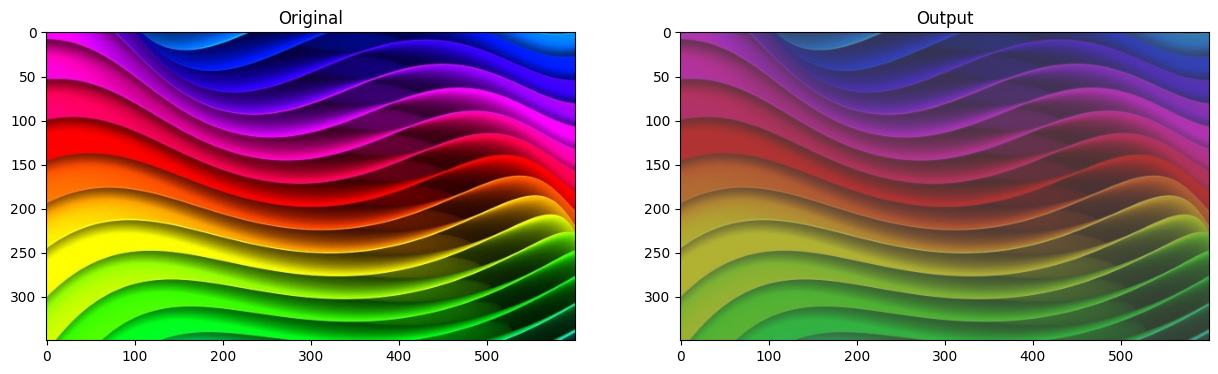

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread("images/alpha.jpg")

# Create an empty image with the same shape and type
new_image = np.zeros(image.shape, image.dtype)

# Ask user for brightness and contrast values
alpha = float(input('* Enter the alpha value [0.1-3.0]: '))  # Contrast control
beta = int(input('* Enter the beta value [0-100]: '))        # Brightness control

# Apply linear transformation: new_image = alpha*image + beta
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Display original and adjusted images side by side
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.imshow(image[..., ::-1])  # Convert BGR → RGB for matplotlib
plt.title("Original")
plt.subplot(122)
plt.imshow(new_image[..., ::-1])
plt.title("Output")
plt.show()



### Explanation

- **`alpha`**: contrast factor; values **> 1** increase contrast, values **< 1** decrease contrast.  
- **`beta`**: brightness offset; adding a **positive number** brightens the image, while a **negative number** darkens it.  
- **`cv2.convertScaleAbs()`**: applies the linear transformation  
  $$
  \text{new\_image} = \alpha \cdot \text{image} + \beta
  $$  
  and converts the result to 8-bit unsigned integers.  
- **`image[..., ::-1]`**: converts OpenCV’s **BGR** format to **RGB** for correct display in Matplotlib.  

> This is a simple **linear method** to adjust both brightness and contrast.


This operation can be applied to **each individual pixel** or to rows and columns of the image. Assuming **i** is the row index and **j** is the column index, the formula is:

$$
g(i,j) = \alpha \cdot f(i,j) + \beta
$$

$$\(f(i,j)\)$$ original pixel value at row i and column j

$$\(\alpha\)$$ contrast factor  

$$\(\beta\)$$ brightness offset  

$$\(g(i,j)\)$$ new pixel value after applying the transformation


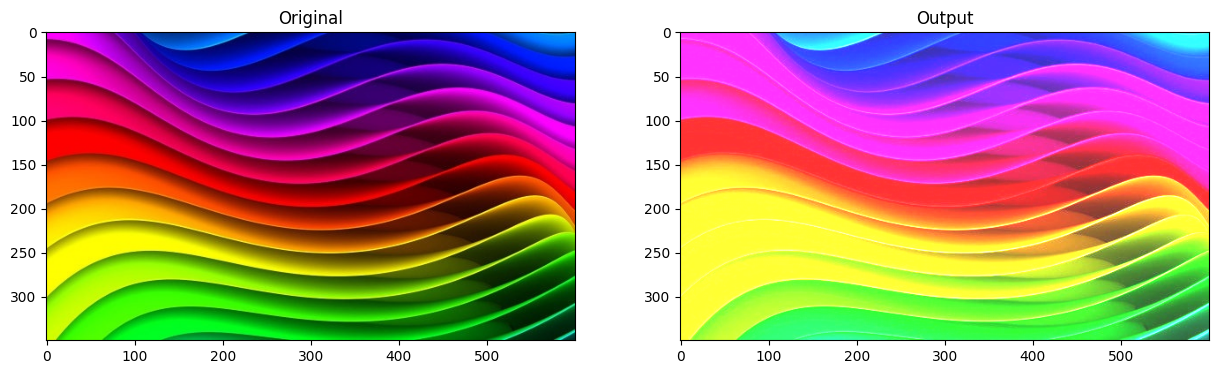

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("images/alpha.jpg")

new_image2 = np.zeros(image.shape, image.dtype)

alpha = float(input('* Enter the alpha value [0.1-3.0]: '))
beta = int(input('* Enter the beta value [0-100]: '))

# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image2[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)


plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(new_image2[...,::-1]);plt.title("Output");



# Histogram analysis

In [5]:
gray_image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
gray_new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2GRAY)

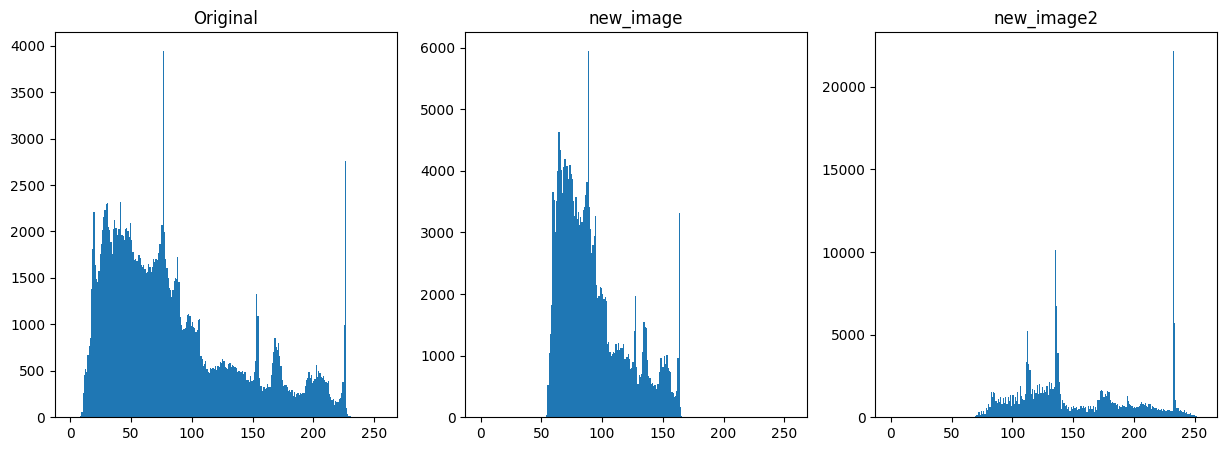

In [6]:
plt.figure(figsize=[15,5])
plt.subplot(131);plt.hist(gray_image.ravel(),256,[0,256]);plt.title("Original");
plt.subplot(132);plt.hist(gray_new_image.ravel(),256,[0,256]);plt.title("new_image");
plt.subplot(133);plt.hist(gray_new_image2.ravel(),256,[0,256]);plt.title("new_image2");


## Histogram Analysis

Histogram analysis is a fundamental tool in image processing used to understand the **distribution of pixel intensities** in an image.

### What is a Histogram?

- A **histogram** is a graph that shows the number of pixels for each intensity value.  
- For a **grayscale image**, the intensity values range from 0 (black) to 255 (white).  
- For a **color image**, a separate histogram can be plotted for each channel (Blue, Green, Red).

### Why Use Histograms?

- **Brightness analysis:** See if an image is too dark or too bright.  
- **Contrast analysis:** Check how spread out the pixel intensities are.  
- **Image enhancement:** Adjust brightness, contrast, or perform histogram equalization.  
- **Segmentation & Thresholding:** Determine thresholds based on intensity distribution.

### Example in OpenCV (Grayscale)

```python
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("images/input.jpg", 0)  # Load as grayscale
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.show()


Source: https://docs.opencv.org/4.6.0/d3/dc1/tutorial_basic_linear_transform.html